Monte Carlo: (x, y, z) = (0.0012374868202567058, -0.0044351155490884864, 5.6832492985961426e-06)
Gradient Descent: (x, y, z) = (-0.000155846182086, 0.0109439536936, 2.99546746281e-05)


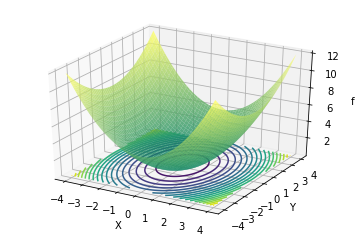

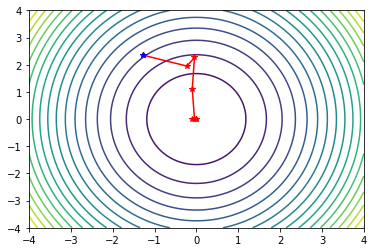

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def gradient(f, x, h=.001):
    return np.array([(f([x[0]+h/2, x[1]]) - f([x[0]-h/2, x[1]])) / h, (f([x[0], x[1]+h/2]) - f([x[0], x[1]-h/2])) / h])

def monte_carlo(f, x_min, x_max, y_min, y_max, num_of_samples=1000):
    x = (x_max-x_min) * np.random.random(num_of_samples) + x_min
    y = (y_max-y_min) * np.random.random(num_of_samples) + y_min
    x_mesh, y_mesh = np.meshgrid(x, y)
    z = f([x_mesh, y_mesh])
    
    z_min = f([x[0], y[0]])
    for i in range(len(x)):
        for j in range(len(y)):
            next_z = f([x[i], y[j]])
            if next_z < z_min:
                z_min = next_z
                x_min = x[i]
                y_min = y[j]

    return (x_min, y_min, z_min)

def gradient_descent(f, x0, num_of_iterations=100):
    x_hist = []
    y_hist = []
    z_hist = []
    jump = .01
    x1 = np.array([x0[0], x0[1]]) - jump * gradient(f, x0)
    x_hist.append(x0[0])
    y_hist.append(x0[1])
    z_hist.append(f(x0))
    x_hist.append(x1[0])
    y_hist.append(x1[1])
    z_hist.append(f(x1))
    for i in range(num_of_iterations - 1):
        gradient_0 = gradient(f, x0)
        gradient_1 = gradient(f, x1)
        gradient_diff = gradient_1 - gradient_0
        grad_diff_mag = np.sqrt(gradient_diff[0]**2 + gradient_diff[1]**2)
        jump = (np.multiply(np.array([x1[0]-x0[0], x1[1]-x0[1]]).T, np.array(gradient_diff))) / grad_diff_mag**2
        temp_x, temp_y = x1[0], x1[1]
        new_values = np.array([x0[0], x0[1]]) - jump * gradient_0
        x1[0], x1[1] = new_values[0], new_values[1]
        x0[0], x0[1] = temp_x, temp_y
        x_hist.append(x1[0])
        y_hist.append(x1[1])
        z_hist.append(f([x1[0], x1[1]]))
        if np.sqrt(gradient_1[0]**2 + gradient_1[1]**2) < .01:
            break
    return x_hist, y_hist, z_hist

x_min, x_max = -4, 4                         # range of x
y_min, y_max = -4, 4                          # range of y

f = lambda x: 1/2*x[0]**2 + 1/4*x[1]**2

# monte carlo method
print("Monte Carlo: (x, y, z) =", monte_carlo(f, x_min, x_max, y_min, y_max))

# gradient descent method
x_rand = (x_max - x_min) * np.random.random() + x_min
y_rand = (y_max - y_min) * np.random.random() + y_min
x_values, y_values, z_values = gradient_descent(f, [x_rand, y_rand])
print("Gradient Descent: (x, y, z) = (" + str(x_values[-1]) + ", " + str(y_values[-1]) + ", " + str(z_values[-1]) + ")")

# plot graphs
nx = np.linspace(x_min,x_max,100)
ny = np.linspace(y_min,y_max,100)
x,y = np.meshgrid(nx,ny)

z = f([x, y])
fig = plt.figure(0)
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
levels = np.arange(np.min(z), np.max(z), .7)
cset = ax.contour(x,y,z, zdir='z', offset=0, levels=levels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

# plot gradient descent points
plt.figure(1)
plt.contour(x, y, z, levels=levels)
plt.plot(x_values, y_values, 'r*-')
plt.plot(x_rand, y_rand, 'b*')

plt.show()

A randomly selected point (given by the blue star on the contour map) undergoes gradient descent until it settles around a minimum.

My Gradient Descent: (x, y, z) = (-0.00455405947544, -0.0102780941559, 3.38810389924e-05)

Scipy Method: 
Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 5
         Function evaluations: 24
         Gradient evaluations: 6


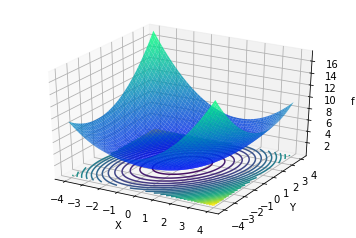

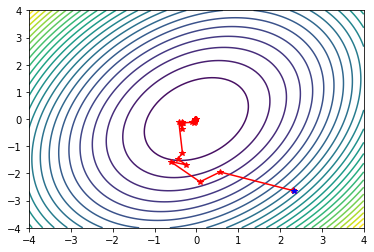

In [4]:
from scipy.optimize import minimize

g = lambda x: x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4

# my gradient descent method
x_rand = (x_max - x_min) * np.random.random() + x_min
y_rand = (y_max - y_min) * np.random.random() + y_min
x_values, y_values, z_values = gradient_descent(g, [x_rand, y_rand])
print("My Gradient Descent: (x, y, z) = (" + str(x_values[-1]) + ", " + str(y_values[-1]) + ", " + str(z_values[-1]) + ")")

# scipy method
print("\nScipy Method: ")
minimize(g, [x_rand, y_rand], method='BFGS', tol=1e-4, options={'disp': True})

# plot 3D graph
z = g([x, y])
fig = plt.figure(2)
ax = fig.gca(projection='3d')
ax.plot_surface(x,y,z, cmap='winter', alpha=0.8)
levels = np.arange(np.min(z), np.max(z), .7)
cset = ax.contour(x,y,z, zdir='z', offset=0, levels=levels)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f')

# plot contour map with gradient descent
plt.figure(3)
plt.contour(x, y, z, levels=levels)
plt.plot(x_values, y_values, 'r*-')
plt.plot(x_rand, y_rand, 'b*')